# 특성 공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime
from datetime import date

In [2]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

# 데이터 프레임 출력시 요약x. 전체 출력o
pd.set_option('display.max_rows', None)

# 데이터 불러오기

In [3]:
df_stock = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\주식시장_일별__20220415170553.csv", encoding='euc-kr')
df_covid = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\서울특별시 코로나19 자치구별 확진자 발생동향.csv", encoding='euc-kr')
df_vaccine = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\서울특별시 코로나19 백신 예방접종 현황.csv", encoding='euc-kr')
df_distance = pd.read_csv("C:\\Users\\Hi\\JupyterProjects\\JupyterML\\Covid\\data\\covid19_kor\\지역별 거리두기.csv")

# 데이터 확인

In [4]:
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [5]:
df_covid.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.02.17.00,6850,246,6313,221,10242,405,11930,804,15729,...,17646,784,25413,1169,28864,1218,20800,1064,31146,1254
1,2022.02.16.00,6604,227,6092,179,9837,340,11126,639,14865,...,16862,764,24244,1040,27646,1356,19736,1180,29892,898
2,2022.02.15.00,6377,182,5913,136,9497,218,10487,316,14122,...,16098,440,23204,819,26290,682,18556,528,28994,844
3,2022.02.14.00,6195,96,5777,91,9279,256,10171,336,13669,...,15658,386,22385,632,25608,726,18028,588,28150,735
4,2022.02.13.00,6099,184,5686,111,9023,248,9835,408,13192,...,15272,430,21753,747,24882,800,17440,664,27416,728


In [6]:
df_vaccine.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),추가접종대상자
0,2022.03.18,9401888,807,8314802,88.4,917,8229479,87.5,13602.0,5830011.0,62.0,9401888.0
1,2022.03.17,9401888,459,8313864,88.4,519,8228431,87.5,8497.0,5816025.0,61.9,9401888.0
2,2022.03.16,9401888,372,8313346,88.4,330,8227846,87.5,5556.0,5807312.0,61.8,9401888.0
3,2022.03.15,9401888,383,8313033,88.4,562,8227560,87.5,5754.0,5801689.0,61.7,9401888.0
4,2022.03.14,9401888,637,8312602,88.4,831,8226915,87.5,8779.0,5795463.0,61.6,9401888.0


In [7]:
df_distance.head()

,시도명,시작일자,종료일자,차수,사회적 거리두기 단계코드
0,인천,2020-03-22,2020-05-06,1,1.0
1,전북,2020-03-22,2020-05-06,1,1.0
2,대전,2020-03-22,2020-05-06,1,1.0
3,전남,2020-03-22,2020-05-06,1,1.0
4,세종,2020-03-22,2020-05-06,1,1.0


In [8]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자치구 기준일  745 non-null    object
 1   종로구 전체   745 non-null    int64 
 2   종로구 추가   745 non-null    int64 
 3   중구 전체    745 non-null    int64 
 4   중구 추가    745 non-null    int64 
 5   용산구 전체   745 non-null    int64 
 6   용산구 추가   745 non-null    int64 
 7   성동구 전체   745 non-null    int64 
 8   성동구 추가   745 non-null    int64 
 9   광진구 전체   745 non-null    int64 
 10  광진구 추가   745 non-null    int64 
 11  동대문구 전체  745 non-null    int64 
 12  동대문구 추가  745 non-null    int64 
 13  중랑구 전체   745 non-null    int64 
 14  중랑구 추가   745 non-null    int64 
 15  성북구 전체   745 non-null    int64 
 16  성북구 추가   745 non-null    int64 
 17  강북구 전체   745 non-null    int64 
 18  강북구 추가   745 non-null    int64 
 19  도봉구 전체   745 non-null    int64 
 20  도봉구 추가   745 non-null    int64 
 21  노원구 전체   745 non-null    int64 
 22  노원

In [9]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 506 entries, 계정별 to 2022.02.17
dtypes: float64(504), object(2)
memory usage: 43.6+ KB


In [10]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         333 non-null    object 
 1   접종대상자       333 non-null    int64  
 2   당일 1차접종자 수  333 non-null    int64  
 3   1차접종 누계     333 non-null    int64  
 4   1차접종률(%)    333 non-null    float64
 5   당일 2차접종자 수  333 non-null    int64  
 6   2차접종 누계     333 non-null    int64  
 7   2차접종률(%)    333 non-null    float64
 8   당일 추가접종자 수  164 non-null    float64
 9   추가접종 누계     158 non-null    float64
 10  추가접종률(%)    142 non-null    float64
 11  추가접종대상자     95 non-null     float64
dtypes: float64(6), int64(5), object(1)
memory usage: 31.3+ KB


In [11]:
df_distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시도명            201 non-null    object 
 1   시작일자           201 non-null    object 
 2   종료일자           201 non-null    object 
 3   차수             201 non-null    int64  
 4   사회적 거리두기 단계코드  201 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.0+ KB


# Keep Distance

In [12]:
# 오미크론 우세종 된 이후 데이터 제거
df_distance = df_distance[df_distance['시도명'] == '서울']

In [13]:
df_distance.loc[12]=['서울', '2020-02-05','2020-03-21', 0, 0.0]
df_distance.loc[14]=['서울','2020-05-06','2020-08-16', 1, 1.0]
df_distance.loc[193]=['서울', '2021-10-18','2022-02-17', 4, 4.0]

In [14]:
df_distance = df_distance.drop(['시도명'], axis = 1)

In [15]:
df_distance # 확인용 코드

,시작일자,종료일자,차수,사회적 거리두기 단계코드
13,2020-03-22,2020-05-06,1,1.0
18,2020-08-16,2020-08-23,2,2.0
27,2020-08-23,2020-08-30,2,2.0
39,2020-08-30,2020-09-14,2,2.5
41,2020-09-14,2020-10-12,2,2.0
59,2020-10-12,2020-11-07,2,1.0
66,2020-11-07,2020-11-19,3,1.0
77,2020-11-19,2020-11-24,3,1.5
83,2020-11-24,2020-12-01,3,2.0
91,2020-12-01,2020-12-08,3,2.0


In [16]:
df_distance = df_distance.sort_index(ascending=True)

In [17]:
df_distance # 확인용 코드

,시작일자,종료일자,차수,사회적 거리두기 단계코드
12,2020-02-05,2020-03-21,0,0.0
13,2020-03-22,2020-05-06,1,1.0
14,2020-05-06,2020-08-16,1,1.0
18,2020-08-16,2020-08-23,2,2.0
27,2020-08-23,2020-08-30,2,2.0
39,2020-08-30,2020-09-14,2,2.5
41,2020-09-14,2020-10-12,2,2.0
59,2020-10-12,2020-11-07,2,1.0
66,2020-11-07,2020-11-19,3,1.0
77,2020-11-19,2020-11-24,3,1.5


In [18]:
df_distance = df_distance.reset_index()

In [19]:
df_distance # 확인용 코드

,index,시작일자,종료일자,차수,사회적 거리두기 단계코드
0,12,2020-02-05,2020-03-21,0,0.0
1,13,2020-03-22,2020-05-06,1,1.0
2,14,2020-05-06,2020-08-16,1,1.0
3,18,2020-08-16,2020-08-23,2,2.0
4,27,2020-08-23,2020-08-30,2,2.0
5,39,2020-08-30,2020-09-14,2,2.5
6,41,2020-09-14,2020-10-12,2,2.0
7,59,2020-10-12,2020-11-07,2,1.0
8,66,2020-11-07,2020-11-19,3,1.0
9,77,2020-11-19,2020-11-24,3,1.5


In [20]:
df_distance = df_distance.drop(['index'], axis = 1)

In [21]:
df_distance # 확인용 코드

,시작일자,종료일자,차수,사회적 거리두기 단계코드
0,2020-02-05,2020-03-21,0,0.0
1,2020-03-22,2020-05-06,1,1.0
2,2020-05-06,2020-08-16,1,1.0
3,2020-08-16,2020-08-23,2,2.0
4,2020-08-23,2020-08-30,2,2.0
5,2020-08-30,2020-09-14,2,2.5
6,2020-09-14,2020-10-12,2,2.0
7,2020-10-12,2020-11-07,2,1.0
8,2020-11-07,2020-11-19,3,1.0
9,2020-11-19,2020-11-24,3,1.5


In [22]:
len(df_distance) # 확인용 코드

18

In [23]:
df_distance.loc[[0], ['시작일자']] # 확인용 코드

,시작일자
0,2020-02-05


In [24]:
df_distance.loc[[0], ['시작일자']].squeeze() # 확인용 코드

'2020-02-05'

In [25]:
df_distance.loc[[0], ['차수']] # 확인용 코드

,차수
0,0


In [26]:
df_distance.loc[[0], ['차수']].squeeze() # 확인용 코드

0

In [27]:
# date_range 생성
def date_range(start, end):
    start = datetime.datetime.strptime(start, "%Y-%m-%d")
    end = datetime.datetime.strptime(end, "%Y-%m-%d")
    dates = [date.strftime("%Y-%m-%d") for date in pd.date_range(start, periods=(end-start).days+1)]
    return dates

In [28]:
# date_range범위를 고려한 새로운 데이터 프레임 생성
dates = date_range((df_distance.loc[[0], ['시작일자']]).squeeze(), (df_distance.loc[[0], ['종료일자']]).squeeze())
df_distance_date = pd.DataFrame({'날짜' : dates})
df_distance_degree = df_distance.loc[[0], ['차수']]
df_distance_piece = pd.concat([df_distance_date, df_distance_degree], axis = 1)
df_distance_new = df_distance_piece.fillna(method='ffill') # 바로 앞 데이터로 결측치 채움

In [29]:
# date_range범위를 고려한 새로운 데이터 프레임 생성
for i in range(1, len(df_distance)):
    dates = date_range((df_distance.loc[[i], ['시작일자']]).squeeze(), (df_distance.loc[[i], ['종료일자']]).squeeze())
    df_distance_date = pd.DataFrame({'날짜' : dates})
    degree = df_distance.loc[[i], ['차수']].squeeze()
    df_distance_degree = pd.DataFrame({'차수' : [degree]})
    df_distance_piece = pd.concat([df_distance_date,df_distance_degree], axis = 1)
    df_distance_piece = df_distance_piece.fillna(method='ffill') # 바로 앞 데이터로 결측치 채움
    df_distance_new = pd.concat([df_distance_new, df_distance_piece], axis = 0)

In [30]:
df_distance_new # 확인용 코드

,날짜,차수
0,2020-02-05,0.0
1,2020-02-06,0.0
2,2020-02-07,0.0
3,2020-02-08,0.0
4,2020-02-09,0.0
5,2020-02-10,0.0
6,2020-02-11,0.0
7,2020-02-12,0.0
8,2020-02-13,0.0
9,2020-02-14,0.0


In [31]:
df_distance_new = df_distance_new.drop_duplicates(['날짜'])

In [32]:
df_distance_new # 확인용 코드

,날짜,차수
0,2020-02-05,0.0
1,2020-02-06,0.0
2,2020-02-07,0.0
3,2020-02-08,0.0
4,2020-02-09,0.0
5,2020-02-10,0.0
6,2020-02-11,0.0
7,2020-02-12,0.0
8,2020-02-13,0.0
9,2020-02-14,0.0


In [33]:
df_distance_new = df_distance_new.reset_index()
df_distance_new = df_distance_new.drop(['index'], axis = 1)

In [34]:
df_distance_new # 확인용 코드

,날짜,차수
0,2020-02-05,0.0
1,2020-02-06,0.0
2,2020-02-07,0.0
3,2020-02-08,0.0
4,2020-02-09,0.0
5,2020-02-10,0.0
6,2020-02-11,0.0
7,2020-02-12,0.0
8,2020-02-13,0.0
9,2020-02-14,0.0


In [35]:
df_distance_new.info() # 확인용 코드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   차수      744 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [36]:
# 데이터 전처리 - 날짜 형식 변환
date_set=[]
remove_set = ['2020-04-15', '2020-04-30', '2020-05-01', '2020-05-05', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01', '2021-05-05', '2021-05-19', '2021-08-16', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-04', '2021-10-11', '2021-12-31', '2022-01-31', '2022-02-01', '2022-02-02']
for item in df_distance_new['날짜']:
    break_flag = 1
    # print(item)
    item=item.split('-')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])
    for remove_data in remove_set:
        if(remove_data == str(date(year, month, day)) or date(year, month, day).weekday() > 4):
            date_set+=[np.nan]
            break_flag = 0
            break
    if(break_flag == 1):
        date_set+=[str(date(year,month,day))]
        
df_distance_new['날짜'] = date_set
df_distance_new.dropna(axis=0, inplace = True)
df_distance_new = df_distance_new.drop_duplicates(['날짜'])

df_distance_new["차수"]=df_distance_new["차수"].apply(float)

# print(type(remove_set[0]))
# print(type(str(date(year, month, day))))
# print(str(date(year, month, day)))

# dropna는 행(열) 중 에서 결측치가 존재하는 행(열)을 제거한다.
# axis = 0이면 행을 제거하고 axis = 1이면 열을 제거한다.
# thresh = N 옵션을 주면 해당 행(열)에 N개 이상의 값이 존재하면 결측치가 존재해도 행(열)을 제거하지 않는다.
# inplace = True 옵션을 주면 항구적 적용이 가능하다.

In [37]:
df_distance_new # 확인용 코드

,날짜,차수
0,2020-02-05,0.0
1,2020-02-06,0.0
2,2020-02-07,0.0
5,2020-02-10,0.0
6,2020-02-11,0.0
7,2020-02-12,0.0
8,2020-02-13,0.0
9,2020-02-14,0.0
12,2020-02-17,0.0
13,2020-02-18,0.0


In [38]:
df_distance_new.info() # 확인용 코드

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 743
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      505 non-null    object 
 1   차수      505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [39]:
# 오미크론 우세종 된 이후 데이터 제거
df_distance_new = df_distance_new[df_distance_new['날짜'] < '2022-01-09']

In [40]:
df_distance_new

,날짜,차수
0,2020-02-05,0.0
1,2020-02-06,0.0
2,2020-02-07,0.0
5,2020-02-10,0.0
6,2020-02-11,0.0
7,2020-02-12,0.0
8,2020-02-13,0.0
9,2020-02-14,0.0
12,2020-02-17,0.0
13,2020-02-18,0.0


In [41]:
df_distance_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 702
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      479 non-null    object 
 1   차수      479 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


# Covid

In [42]:
df_covid_num = df_covid.drop(['자치구 기준일'], axis = 1)

In [43]:
df_covid_num.head()

,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,6850,246,6313,221,10242,405,11930,804,15729,864,...,17646,784,25413,1169,28864,1218,20800,1064,31146,1254
1,6604,227,6092,179,9837,340,11126,639,14865,743,...,16862,764,24244,1040,27646,1356,19736,1180,29892,898
2,6377,182,5913,136,9497,218,10487,316,14122,453,...,16098,440,23204,819,26290,682,18556,528,28994,844
3,6195,96,5777,91,9279,256,10171,336,13669,477,...,15658,386,22385,632,25608,726,18028,588,28150,735
4,6099,184,5686,111,9023,248,9835,408,13192,448,...,15272,430,21753,747,24882,800,17440,664,27416,728


In [44]:
# 서울 전체구 데이터 병합
df_covid_num = df_covid_num.sum(axis = 1)

In [45]:
df_covid_num.head()

0    468666
1    448168
2    422863
3    409556
4    398182
dtype: int64

In [46]:
df_covid_num = df_covid_num.to_frame()
df_covid_num.columns = ['서울 전체']

In [47]:
df_covid_num.head()

,서울 전체
0,468666
1,448168
2,422863
3,409556
4,398182


In [48]:
df_covid = pd.concat([df_covid['자치구 기준일'], df_covid_num], axis = 1)

In [49]:
df_covid.head()

,자치구 기준일,서울 전체
0,2022.02.17.00,468666
1,2022.02.16.00,448168
2,2022.02.15.00,422863
3,2022.02.14.00,409556
4,2022.02.13.00,398182


In [50]:
# 데이터 전처리 - 날짜 형식 변환
date_set=[]
remove_set = ['2020-04-15', '2020-04-30', '2020-05-01', '2020-05-05', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01', '2021-05-05', '2021-05-19', '2021-08-16', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-04', '2021-10-11', '2021-12-31', '2022-01-31', '2022-02-01', '2022-02-02']
for item in df_covid['자치구 기준일']:
    break_flag = 1
    # print(item)
    item=item.split('.')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])
    for remove_data in remove_set:
        if(remove_data == str(date(year, month, day)) or date(year, month, day).weekday() > 4):
            date_set+=[np.nan]
            break_flag = 0
            break
    if(break_flag == 1):
        date_set+=[str(date(year,month,day))]
        # print(datetime.date(year,month,day))
df_covid['자치구 기준일'] = date_set
# df_covid['자치구 기준일'] = pd.to_datetime(df_covid['자치구 기준일'])

df_covid.dropna(axis=0, inplace = True)
df_covid = df_covid.drop_duplicates(['자치구 기준일'])
df_covid["서울 전체"]=df_covid["서울 전체"].apply(float)
df_covid = df_covid.sort_values('자치구 기준일', ascending = True)

# print(type(remove_set[0]))
# print(type(str(date(year, month, day))))
# print(str(date(year, month, day)))

# dropna는 행(열) 중 에서 결측치가 존재하는 행(열)을 제거한다.
# axis = 0이면 행을 제거하고 axis = 1이면 열을 제거한다.
# thresh = N 옵션을 주면 해당 행(열)에 N개 이상의 값이 존재하면 결측치가 존재해도 행(열)을 제거하지 않는다.
# inplace = True 옵션을 주면 항구적 적용이 가능하다.

In [51]:
# 확인용 코드
print(len(remove_set))

27


In [52]:
# 확인용 코드
df_covid['자치구 기준일']

744    2020-02-05
743    2020-02-06
742    2020-02-07
739    2020-02-10
738    2020-02-11
737    2020-02-12
736    2020-02-13
735    2020-02-14
732    2020-02-17
731    2020-02-18
730    2020-02-19
729    2020-02-20
728    2020-02-21
725    2020-02-24
724    2020-02-25
723    2020-02-26
722    2020-02-27
721    2020-02-28
718    2020-03-02
717    2020-03-03
716    2020-03-04
715    2020-03-05
714    2020-03-06
711    2020-03-09
710    2020-03-10
709    2020-03-11
708    2020-03-12
707    2020-03-13
704    2020-03-16
703    2020-03-17
702    2020-03-18
701    2020-03-19
700    2020-03-20
697    2020-03-23
696    2020-03-24
695    2020-03-25
694    2020-03-26
693    2020-03-27
690    2020-03-30
689    2020-03-31
688    2020-04-01
687    2020-04-02
686    2020-04-03
683    2020-04-06
682    2020-04-07
681    2020-04-08
680    2020-04-09
679    2020-04-10
676    2020-04-13
675    2020-04-14
673    2020-04-16
672    2020-04-17
669    2020-04-20
668    2020-04-21
667    2020-04-22
666    202

In [53]:
# 확인용 코드
df_covid.head(3)

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0


In [54]:
# 확인용 코드
df_covid.tail(3)

,자치구 기준일,서울 전체
2,2022-02-15,422863.0
1,2022-02-16,448168.0
0,2022-02-17,468666.0


In [55]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 744 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  505 non-null    object 
 1   서울 전체    505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [56]:
# 오미크론 우세종 된 이후 데이터 제거
df_covid = df_covid[df_covid['자치구 기준일'] < '2022-01-09']

In [57]:
df_covid

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0
739,2020-02-10,0.0
738,2020-02-11,0.0
737,2020-02-12,0.0
736,2020-02-13,0.0
735,2020-02-14,0.0
732,2020-02-17,0.0
731,2020-02-18,0.0


In [58]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 744 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  479 non-null    object 
 1   서울 전체    479 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


# Stock

In [59]:
# 확인용 코드
df_stock.head()

,계정별,2020.02.05,2020.02.06,2020.02.07,2020.02.10,2020.02.11,2020.02.12,2020.02.13,2020.02.14,2020.02.17,...,2022.02.04,2022.02.07,2022.02.08,2022.02.09,2022.02.10,2022.02.11,2022.02.14,2022.02.15,2022.02.16,2022.02.17
0,KOSPI지수 (1980.01.04=100),2165.63,2227.94,2211.95,2201.07,2223.12,2238.38,2232.96,2243.59,2242.17,...,2750.26,2745.06,2746.47,2768.85,2771.93,2747.71,2704.48,2676.54,2729.68,2744.09
1,"거래량(주식시장, 잠정치) (만주)",56312.00,68323.00,76671.00,60047.00,51031.00,62342.00,62961.00,58900.00,45309.00,...,52652.00,41008.00,55489.00,52969.00,50043.00,45698.00,60566.00,57535.00,41515.00,60226.00
2,"거래대금(주식시장 , 잠정치) (억원)",74625.00,80636.00,69263.00,53322.00,64744.00,67750.00,79571.00,61331.00,55661.00,...,111842.00,111059.00,116203.00,101579.00,125638.00,105400.00,113138.00,92255.00,82633.00,116773.00
3,"외국인 순매수(주식시장, 잠정치) (억원)",4578.00,1586.00,223.00,-3039.00,-934.00,-2163.00,2795.00,945.00,-2287.00,...,1945.00,-69.00,-939.00,2355.00,8365.00,6081.00,684.00,-2209.00,-437.00,6516.00
4,"주식시장-거래량(만주, 시간외거래분 포함) (만주)",57440.00,69522.00,80034.00,60957.00,52621.00,63246.00,63867.00,59722.00,45825.00,...,53615.00,41784.00,56053.00,53912.00,50961.00,48052.00,61634.00,58904.00,42237.00,-


In [60]:
# 데이터 전처리 - 전치 + 날짜 형식 변환
df_stock_day = df_stock.columns.values.tolist()
df_stock = df_stock.T
# print(df_stock.T.head())
df_stock['날짜'] = df_stock_day

In [61]:
date_set=[]
for item in df_stock['날짜']:
    # print(item)
    if(item == '계정별'):
        date_set+=[np.nan]
    else:
        item=item.split('.')
        year=int(item[0])
        month=int(item[1])
        day=int(item[2])
        date_set+=[str(date(year,month,day))]
    # print(datetime.date(year,month,day))
df_stock['날짜'] = date_set
# df_stock['날짜'] = pd.to_datetime(df_stock['날짜'])

df_stock.dropna(axis=0, inplace = True)
df_stock.rename(columns={0:'KOSPI'}, inplace = True)
df_stock = df_stock[['KOSPI', '날짜']]
df_stock["KOSPI"]=df_stock["KOSPI"].apply(float)
df_stock = df_stock.sort_values('날짜', ascending = True)

In [62]:
# 확인용 코드
df_stock.head(3)

,KOSPI,날짜
2020.02.05,2165.63,2020-02-05
2020.02.06,2227.94,2020-02-06
2020.02.07,2211.95,2020-02-07


In [63]:
# 확인용 코드
df_stock.tail(3)

,KOSPI,날짜
2022.02.15,2676.54,2022-02-15
2022.02.16,2729.68,2022-02-16
2022.02.17,2744.09,2022-02-17


In [64]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 2020.02.05 to 2022.02.17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   505 non-null    float64
 1   날짜      505 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [65]:
df_stock = df_stock[df_stock['날짜'] < '2022-01-09']

In [66]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2020.02.05 to 2022.01.07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   479 non-null    float64
 1   날짜      479 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


# Vaccine

In [67]:
# 확인용 코드
df_vaccine.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 추가접종자 수,추가접종 누계,추가접종률(%),추가접종대상자
0,2022.03.18,9401888,807,8314802,88.4,917,8229479,87.5,13602.0,5830011.0,62.0,9401888.0
1,2022.03.17,9401888,459,8313864,88.4,519,8228431,87.5,8497.0,5816025.0,61.9,9401888.0
2,2022.03.16,9401888,372,8313346,88.4,330,8227846,87.5,5556.0,5807312.0,61.8,9401888.0
3,2022.03.15,9401888,383,8313033,88.4,562,8227560,87.5,5754.0,5801689.0,61.7,9401888.0
4,2022.03.14,9401888,637,8312602,88.4,831,8226915,87.5,8779.0,5795463.0,61.6,9401888.0


In [68]:
# 데이터 전처리 - 필요한 열 추출
df_vaccine = df_vaccine[['접종일', '당일 1차접종자 수', '1차접종 누계', '당일 2차접종자 수', '2차접종 누계', '당일 추가접종자 수', '추가접종 누계']]
df_vaccine = df_vaccine.fillna(0)

In [69]:
# 데이터 전처리 - 날짜 형식 변환
date_set=[]
for item in df_vaccine['접종일']:
    # print(item)
    item=item.split('.')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])

    date_set+=[str(date(year,month,day))]
    # print(datetime.date(year,month,day))
df_vaccine['접종일'] = date_set
# df_covid['자치구 기준일'] = pd.to_datetime(df_covid['자치구 기준일'])

df_vaccine.dropna(axis=0, inplace = True)

In [70]:
# 확인용 코드
df_vaccine.head(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2022-03-18,807,8314802,917,8229479,13602.0,5830011.0
1,2022-03-17,459,8313864,519,8228431,8497.0,5816025.0
2,2022-03-16,372,8313346,330,8227846,5556.0,5807312.0


In [71]:
# 확인용 코드
df_vaccine.tail(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
330,2021-04-23,10195,345764,119,18376,0.0,0.0
331,2021-04-22,27074,317386,2479,15901,0.0,0.0
332,2021-04-21,22501,291857,2358,13543,0.0,0.0


In [72]:
# 다른 데이터와 날짜 맞추기 위해 평일 날짜 생성 + 자료형 변환
df_hole_day = pd.DataFrame(pd.date_range('20200205', datetime.date(2021,4,20), freq='B'))
df_hole_day.columns=['접종일']
df_hole_day = df_hole_day.astype({'접종일':'str'})
df_hole_day["당일 1차접종자 수"] = 0
df_hole_day["1차접종 누계"] = 0
df_hole_day["당일 2차접종자 수"] = 0
df_hole_day["2차접종 누계"] = 0
df_hole_day["당일 추가접종자 수"] = 0
df_hole_day["추가접종 누계"] = 0

In [73]:
# 확인용 코드
df_hole_day

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2020-02-05,0,0,0,0,0,0
1,2020-02-06,0,0,0,0,0,0
2,2020-02-07,0,0,0,0,0,0
3,2020-02-10,0,0,0,0,0,0
4,2020-02-11,0,0,0,0,0,0
5,2020-02-12,0,0,0,0,0,0
6,2020-02-13,0,0,0,0,0,0
7,2020-02-14,0,0,0,0,0,0
8,2020-02-17,0,0,0,0,0,0
9,2020-02-18,0,0,0,0,0,0


In [74]:
# 데이터 합병
df_hole_day
df_vaccine = pd.concat([df_vaccine, df_hole_day])

In [75]:
# 확인용 코드
df_vaccine.head(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2022-03-18,807,8314802,917,8229479,13602.0,5830011.0
1,2022-03-17,459,8313864,519,8228431,8497.0,5816025.0
2,2022-03-16,372,8313346,330,8227846,5556.0,5807312.0


In [76]:
# 확인용 코드
df_vaccine.tail(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
312,2021-04-16,0,0,0,0,0.0,0.0
313,2021-04-19,0,0,0,0,0.0,0.0
314,2021-04-20,0,0,0,0,0.0,0.0


In [77]:
# 확인용 코드
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 314
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         648 non-null    object 
 1   당일 1차접종자 수  648 non-null    int64  
 2   1차접종 누계     648 non-null    int64  
 3   당일 2차접종자 수  648 non-null    int64  
 4   2차접종 누계     648 non-null    int64  
 5   당일 추가접종자 수  648 non-null    float64
 6   추가접종 누계     648 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 40.5+ KB


In [78]:
# 데이터 전처리 - 날짜 형식 변환
remove_set = ['2020-04-15', '2020-04-30', '2020-05-01', '2020-05-05', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-09', '2020-12-25', '2020-12-31', '2021-01-01', '2021-02-11', '2021-02-12', '2021-03-01', '2021-05-05', '2021-05-19', '2021-08-16', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-04', '2021-10-11', '2021-12-31', '2022-01-31', '2022-02-01', '2022-02-02']
date_set=[]
for item in df_vaccine['접종일']:
    # print(item)
    break_flag = 1
    item=item.split('-')
    year=int(item[0])
    month=int(item[1])
    day=int(item[2])

    for remove_data in remove_set:
        if(remove_data == str(date(year, month, day)) or date(year, month, day).weekday() > 4 or str(date(year,month,day)) > '2022-02-17'):
            date_set+=[np.nan]
            break_flag = 0
            break
    if(break_flag == 1):
        date_set+=[str(date(year,month,day))]
        # print(datetime.date(year,month,day))
df_vaccine['접종일'] = date_set
# df_covid['자치구 기준일'] = pd.to_datetime(df_covid['자치구 기준일'])

In [79]:
# 데이터 전처리 - 결측치, 중복값 제거 + 정렬
df_vaccine.dropna(axis=0, inplace = True)
df_vaccine = df_vaccine.drop_duplicates(['접종일'])
df_vaccine = df_vaccine.sort_values('접종일', ascending = True)

In [80]:
# 확인용 코드
df_vaccine.head(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,2020-02-05,0,0,0,0,0.0,0.0
1,2020-02-06,0,0,0,0,0.0,0.0
2,2020-02-07,0,0,0,0,0.0,0.0


In [81]:
# 확인용 코드
df_vaccine.tail(3)

,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
31,2022-02-15,1505,8282313,1456,8192213,21531.0,5368483.0
30,2022-02-16,1556,8284326,1495,8194196,30743.0,5390726.0
29,2022-02-17,1866,8286542,2165,8196392,40035.0,5422466.0


In [82]:
# 확인용 코드
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         505 non-null    object 
 1   당일 1차접종자 수  505 non-null    int64  
 2   1차접종 누계     505 non-null    int64  
 3   당일 2차접종자 수  505 non-null    int64  
 4   2차접종 누계     505 non-null    int64  
 5   당일 추가접종자 수  505 non-null    float64
 6   추가접종 누계     505 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 31.6+ KB


In [83]:
df_vaccine = df_vaccine[df_vaccine['접종일'] < '2022-01-09']

In [84]:
df_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 70
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         479 non-null    object 
 1   당일 1차접종자 수  479 non-null    int64  
 2   1차접종 누계     479 non-null    int64  
 3   당일 2차접종자 수  479 non-null    int64  
 4   2차접종 누계     479 non-null    int64  
 5   당일 추가접종자 수  479 non-null    float64
 6   추가접종 누계     479 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 29.9+ KB


In [85]:
# 데이터 전처리 - 인덱스 재할당
df_vaccine = df_vaccine.reset_index()

In [86]:
# 확인용 코드
df_vaccine

,index,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,0,2020-02-05,0,0,0,0,0.0,0.0
1,1,2020-02-06,0,0,0,0,0.0,0.0
2,2,2020-02-07,0,0,0,0,0.0,0.0
3,3,2020-02-10,0,0,0,0,0.0,0.0
4,4,2020-02-11,0,0,0,0,0.0,0.0
5,5,2020-02-12,0,0,0,0,0.0,0.0
6,6,2020-02-13,0,0,0,0,0.0,0.0
7,7,2020-02-14,0,0,0,0,0.0,0.0
8,8,2020-02-17,0,0,0,0,0.0,0.0
9,9,2020-02-18,0,0,0,0,0.0,0.0


# 차집합 확인

In [87]:
# 확인용 코드
list1 = list(np.array(df_covid['자치구 기준일'].tolist()))
print(len(set(list1)))

479


In [88]:
# 확인용 코드
list2 = list(np.array(df_stock['날짜'].tolist()))
print(len(set(list2)))

479


In [89]:
# 확인용 코드
list3 = list(np.array(df_vaccine['접종일'].tolist()))
list4 = list(np.array(df_vaccine['당일 1차접종자 수'].tolist()))
list5 = list(np.array(df_vaccine['1차접종 누계'].tolist()))
list6 = list(np.array(df_vaccine['당일 2차접종자 수'].tolist()))
list7 = list(np.array(df_vaccine['2차접종 누계'].tolist()))
list8 = list(np.array(df_vaccine['당일 추가접종자 수'].tolist()))
list9 = list(np.array(df_vaccine['추가접종 누계'].tolist()))
print(len(set(list3)))
print(len(set(list4)))
print(len(set(list5)))
print(len(set(list6)))
print(len(set(list7)))
print(len(set(list8)))
print(len(set(list9)))

479
177
179
177
179
62
62


In [90]:
# 확인용 코드
A = list(set(list3) - set(list2))
B = list(set(list3) - set(list1))
print(A)
print(B)

[]
[]


In [91]:
# 확인용 코드
df_vaccine

,index,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,0,2020-02-05,0,0,0,0,0.0,0.0
1,1,2020-02-06,0,0,0,0,0.0,0.0
2,2,2020-02-07,0,0,0,0,0.0,0.0
3,3,2020-02-10,0,0,0,0,0.0,0.0
4,4,2020-02-11,0,0,0,0,0.0,0.0
5,5,2020-02-12,0,0,0,0,0.0,0.0
6,6,2020-02-13,0,0,0,0,0.0,0.0
7,7,2020-02-14,0,0,0,0,0.0,0.0
8,8,2020-02-17,0,0,0,0,0.0,0.0
9,9,2020-02-18,0,0,0,0,0.0,0.0


In [92]:
# 확인용 코드
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 2020.02.05 to 2022.01.07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOSPI   479 non-null    float64
 1   날짜      479 non-null    object 
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


In [93]:
# 확인용 코드
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 744 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  479 non-null    object 
 1   서울 전체    479 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.2+ KB


In [94]:
# 확인용 코드
df_covid.head(5)

,자치구 기준일,서울 전체
744,2020-02-05,12.0
743,2020-02-06,15.0
742,2020-02-07,0.0
739,2020-02-10,0.0
738,2020-02-11,0.0


In [95]:
# 확인용 코드
df_covid.tail(5)

,자치구 기준일,서울 전체
45,2022-01-03,229860.0
44,2022-01-04,230739.0
43,2022-01-05,232625.0
42,2022-01-06,233627.0
41,2022-01-07,234495.0


In [96]:
# 확인용 코드
df_stock.head(5)

,KOSPI,날짜
2020.02.05,2165.63,2020-02-05
2020.02.06,2227.94,2020-02-06
2020.02.07,2211.95,2020-02-07
2020.02.10,2201.07,2020-02-10
2020.02.11,2223.12,2020-02-11


In [97]:
# 확인용 코드
df_stock.tail(5)

,KOSPI,날짜
2022.01.03,2988.77,2022-01-03
2022.01.04,2989.24,2022-01-04
2022.01.05,2953.97,2022-01-05
2022.01.06,2920.53,2022-01-06
2022.01.07,2954.89,2022-01-07


In [98]:
# 확인용 코드
df_vaccine.head(5)

,index,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
0,0,2020-02-05,0,0,0,0,0.0,0.0
1,1,2020-02-06,0,0,0,0,0.0,0.0
2,2,2020-02-07,0,0,0,0,0.0,0.0
3,3,2020-02-10,0,0,0,0,0.0,0.0
4,4,2020-02-11,0,0,0,0,0.0,0.0


In [99]:
# 확인용 코드
df_vaccine.tail(5)

,index,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계
474,74,2022-01-03,3998,8198110,8510,7945831,60977.0,3477076.0
475,73,2022-01-04,2907,8202972,10284,7955403,54988.0,3540896.0
476,72,2022-01-05,2833,8206489,11544,7966424,64629.0,3598300.0
477,71,2022-01-06,3737,8209818,16140,7978639,100727.0,3664712.0
478,70,2022-01-07,2552,8203031,12017,7941012,64827.0,3385648.0


In [100]:
# 확인용 코드
df_distance_new.head(5)

,날짜,차수
0,2020-02-05,0.0
1,2020-02-06,0.0
2,2020-02-07,0.0
5,2020-02-10,0.0
6,2020-02-11,0.0


In [101]:
# 확인용 코드
df_distance_new.tail(5)

,날짜,차수
698,2022-01-03,4.0
699,2022-01-04,4.0
700,2022-01-05,4.0
701,2022-01-06,4.0
702,2022-01-07,4.0


# 데이터 병합

In [102]:
# 데이터 전처리 - 인덱스 재할당
df_vaccine = df_vaccine.reset_index()
df_covid = df_covid.reset_index()
df_distance_new = df_distance_new.reset_index()

In [103]:
# 데이터 병합
df_input = pd.concat([df_vaccine, df_covid['서울 전체']], axis=1)
df_input = pd.concat([df_input, df_distance_new['차수']], axis=1)

In [104]:
df_input # 확인용 코드

,level_0,index,접종일,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계,서울 전체,차수
0,0,0,2020-02-05,0,0,0,0,0.0,0.0,12.0,0.0
1,1,1,2020-02-06,0,0,0,0,0.0,0.0,15.0,0.0
2,2,2,2020-02-07,0,0,0,0,0.0,0.0,0.0,0.0
3,3,3,2020-02-10,0,0,0,0,0.0,0.0,0.0,0.0
4,4,4,2020-02-11,0,0,0,0,0.0,0.0,0.0,0.0
5,5,5,2020-02-12,0,0,0,0,0.0,0.0,0.0,0.0
6,6,6,2020-02-13,0,0,0,0,0.0,0.0,0.0,0.0
7,7,7,2020-02-14,0,0,0,0,0.0,0.0,0.0,0.0
8,8,8,2020-02-17,0,0,0,0,0.0,0.0,0.0,0.0
9,9,9,2020-02-18,0,0,0,0,0.0,0.0,0.0,0.0


In [105]:
df_input.info() # 확인용 코드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     479 non-null    int64  
 1   index       479 non-null    int64  
 2   접종일         479 non-null    object 
 3   당일 1차접종자 수  479 non-null    int64  
 4   1차접종 누계     479 non-null    int64  
 5   당일 2차접종자 수  479 non-null    int64  
 6   2차접종 누계     479 non-null    int64  
 7   당일 추가접종자 수  479 non-null    float64
 8   추가접종 누계     479 non-null    float64
 9   서울 전체       479 non-null    float64
 10  차수          479 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 41.3+ KB


In [106]:
# 필요없는 열 삭제
df_input = df_input.drop(['level_0', 'index', '접종일'], axis=1)

In [107]:
df_input.info() # 확인용 코드

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   당일 1차접종자 수  479 non-null    int64  
 1   1차접종 누계     479 non-null    int64  
 2   당일 2차접종자 수  479 non-null    int64  
 3   2차접종 누계     479 non-null    int64  
 4   당일 추가접종자 수  479 non-null    float64
 5   추가접종 누계     479 non-null    float64
 6   서울 전체       479 non-null    float64
 7   차수          479 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 30.1 KB


In [108]:
df_input # 확인용 코드

,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계,서울 전체,차수
0,0,0,0,0,0.0,0.0,12.0,0.0
1,0,0,0,0,0.0,0.0,15.0,0.0
2,0,0,0,0,0.0,0.0,0.0,0.0
3,0,0,0,0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0,0.0
5,0,0,0,0,0.0,0.0,0.0,0.0
6,0,0,0,0,0.0,0.0,0.0,0.0
7,0,0,0,0,0.0,0.0,0.0,0.0
8,0,0,0,0,0.0,0.0,0.0,0.0
9,0,0,0,0,0.0,0.0,0.0,0.0


In [109]:
df_input.head() # 확인용 코드

,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계,서울 전체,차수
0,0,0,0,0,0.0,0.0,12.0,0.0
1,0,0,0,0,0.0,0.0,15.0,0.0
2,0,0,0,0,0.0,0.0,0.0,0.0
3,0,0,0,0,0.0,0.0,0.0,0.0
4,0,0,0,0,0.0,0.0,0.0,0.0


In [110]:
df_input.tail() # 확인용 코드

,당일 1차접종자 수,1차접종 누계,당일 2차접종자 수,2차접종 누계,당일 추가접종자 수,추가접종 누계,서울 전체,차수
474,3998,8198110,8510,7945831,60977.0,3477076.0,229860.0,4.0
475,2907,8202972,10284,7955403,54988.0,3540896.0,230739.0,4.0
476,2833,8206489,11544,7966424,64629.0,3598300.0,232625.0,4.0
477,3737,8209818,16140,7978639,100727.0,3664712.0,233627.0,4.0
478,2552,8203031,12017,7941012,64827.0,3385648.0,234495.0,4.0


# 시각화

In [111]:
import matplotlib.pyplot as plt

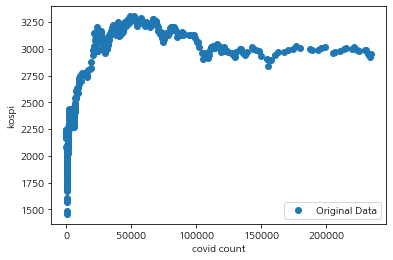

In [112]:
# 시각화
df_covid_count = df_covid['서울 전체']
df_kospi = df_stock['KOSPI']
plt.scatter(df_covid_count, df_kospi, label='Original Data')
plt.xlabel('covid count')
plt.ylabel('kospi')
plt.legend(loc='lower right')
plt.show()

# 데이터셋 분류

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# 데이터셋 분류
train_input, test_input, train_target, test_target = train_test_split(
    df_input, df_kospi,  random_state=42)

In [115]:
# 확인용 코드
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(359, 8) (120, 8)
(359,) (120,)


## 사이킷런의 변환기

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
# 변환기
poly = PolynomialFeatures(include_bias=False)

# 특성 조합 찾기
poly.fit(train_input)

# 실제 특성 조합 데이터 반환
train_poly = poly.transform(train_input)

In [118]:
# 확인용 코드
print(train_poly.shape)

(359, 44)


In [119]:
# 특성 조합 확인
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x6^2',
 'x6 x7',
 'x7^2']

In [120]:
test_poly = poly.transform(test_input)

In [121]:
# 확인용 코드
print(train_poly.shape)
print(train_target.shape)

(359, 44)
(359,)


## 다중 회귀 모델 훈련하기

In [122]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선정 & 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 모델 평가
print("poly_train_accuracy :", end = ' ')
print(lr.score(train_poly, train_target))

poly_train_accuracy : 0.9568718858688586


In [123]:
# 모델 평가 of 테스트 데이터
print("poly_test_accuracy :", end = ' ')
print(lr.score(test_poly, test_target))

poly_test_accuracy : 0.9427067592554206


In [124]:
# 변환기
poly = PolynomialFeatures(degree=4, include_bias=False)

# 특성 조합 찾기
poly.fit(train_input)

# 실제 데이터 반환
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [125]:
print(train_poly.shape)

(359, 494)


In [126]:
# 선형 회귀 모델 훈련
lr.fit(train_poly, train_target)

# 모델 평가
print("poly_train_accuracy :", end = ' ')
print(lr.score(train_poly, train_target))

poly_train_accuracy : 0.6781180529140944


In [127]:
# 모델 평가 by 테스트 데이터
print("poly_train_accuracy :", end = ' ')
print(lr.score(test_poly, test_target))

poly_train_accuracy : -47443757119.19552


## 규제

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 특성 스케일 정규화 & 훈련
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [129]:
from sklearn.linear_model import Ridge

# 규제 - 릿지 모델 선정 & 훈련
ridge = Ridge()
ridge.fit(train_scaled, train_target)

# 모델 평가
print("ridge_train_accuracy :", end = ' ')
print(ridge.score(train_scaled, train_target))

ridge_train_accuracy : 0.9421521865661368


In [130]:
# 모델 평가 by 테스트 데이터
print("ridge_test_accuracy :", end = ' ')
print(ridge.score(test_scaled, test_target))

ridge_test_accuracy : 0.9354329485358819


In [131]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [132]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 규제 - 릿지 모델 선정 & 훈련
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    
    # 모델평가 저장 + 리스트화
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


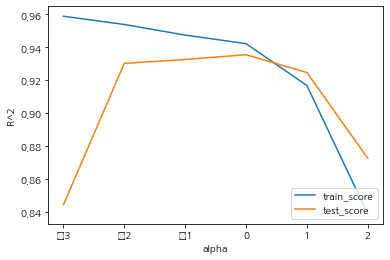

In [133]:
# 시각화
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(loc='lower right')
plt.show()

In [134]:
# 규제 - 릿지 모델 선정 & 훈련
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, train_target)

# 모델 평가
print("ridge_train_accuracy :", end = ' ')
print(ridge.score(train_scaled, train_target))
print("ridge_test_accuracy :", end = ' ')
print(ridge.score(test_scaled, test_target))

ridge_train_accuracy : 0.9421521865661368
ridge_test_accuracy : 0.9354329485358819


In [135]:
# 결과 예측 by 테스트 데이터
test_ridge_pre = ridge.predict(test_scaled)

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_ridge_pre)
mse = mean_squared_error(test_target, test_ridge_pre)
rmse = np.sqrt(mse)
print("ㅡㅡㅡridge errorㅡㅡㅡ")
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

ㅡㅡㅡridge errorㅡㅡㅡ
MAE : 83.730
MSE : 16971.206
RMSE : 130.274


## 라쏘

In [136]:
from sklearn.linear_model import Lasso

# 규제 - 라쏘 모델 선정 & 훈련
lasso = Lasso()
lasso.fit(train_scaled, train_target)

# 모델 평가
print("lasso_train_accuracy :", end = ' ')
print(lasso.score(train_scaled, train_target))
# 모델 평가 by 테스트 데이터
print("lasso_test_accuracy :", end = ' ')
print(lasso.score(test_scaled, test_target))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241555.40347024053, tolerance: 8325.522186786295
  model = cd_fast.enet_coordinate_descent(


lasso_train_accuracy : 0.9419730822658743
lasso_test_accuracy : 0.9355412146005953


In [137]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 규제 - 라쏘 모델 선정 & 훈련
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    
    # 모델평가 저장 + 리스트화
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2078184.5906364603, tolerance: 8325.522186786295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1774485.4792238567, tolerance: 8325.522186786295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383333.34514933964, tolerance: 8325.522186786295
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


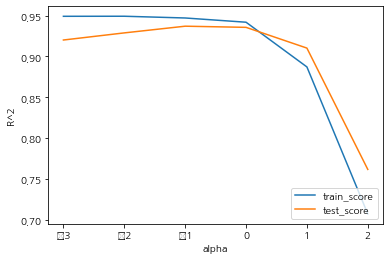

In [138]:
# 시각화
plt.plot(np.log10(alpha_list), train_score, label='train_score')
plt.plot(np.log10(alpha_list), test_score, label='test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(loc='lower right')
plt.show()

In [139]:
# 규제 - 릿지 모델 선정 & 훈련
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_target)

# 모델 평가
print("lasso_train_accuracy :", end = ' ')
print(lasso.score(train_scaled, train_target))
print("lasso_test_accuracy :", end = ' ')
print(lasso.score(test_scaled, test_target))

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241555.40347024053, tolerance: 8325.522186786295
  model = cd_fast.enet_coordinate_descent(


lasso_train_accuracy : 0.9419730822658743
lasso_test_accuracy : 0.9355412146005953


In [140]:
# 결과 예측 by 테스트 데이터
test_lasso_pre = lasso.predict(test_scaled)

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_lasso_pre)
mse = mean_squared_error(test_target, test_lasso_pre)
rmse = np.sqrt(mse)
print("ㅡㅡㅡlasso errorㅡㅡㅡ")
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

ㅡㅡㅡlasso errorㅡㅡㅡ
MAE : 84.699
MSE : 16942.749
RMSE : 130.164


In [141]:
# 계수가 0인 특성 출력
print(np.sum(lasso.coef_ == 0))

461


# 시각화

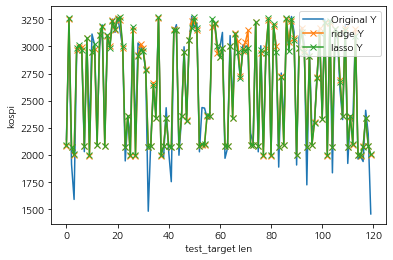

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(test_target)), test_target, '-', label="Original Y")
# ax.plot(range(len(test_target)), test_prediction, '-x', label="linear Y")
ax.plot(range(len(test_target)), test_ridge_pre, '-x', label="ridge Y")
ax.plot(range(len(test_target)), test_lasso_pre, '-x', label="lasso Y")
plt.legend(loc='upper right')
plt.xlabel('test_target len')
plt.ylabel('kospi')
plt.show()

# GridSearchCV

In [143]:
# 테스트 코드
import numpy as np
list(np.logspace(-3,3,num = 100, base = 10))

[0.001,
 0.0011497569953977356,
 0.0013219411484660286,
 0.0015199110829529332,
 0.001747528400007683,
 0.002009233002565048,
 0.0023101297000831605,
 0.0026560877829466868,
 0.0030538555088334154,
 0.003511191734215131,
 0.004037017258596553,
 0.004641588833612782,
 0.005336699231206312,
 0.006135907273413176,
 0.007054802310718645,
 0.008111308307896872,
 0.0093260334688322,
 0.010722672220103232,
 0.012328467394420659,
 0.014174741629268055,
 0.016297508346206444,
 0.01873817422860384,
 0.021544346900318846,
 0.024770763559917114,
 0.02848035868435802,
 0.03274549162877728,
 0.037649358067924674,
 0.04328761281083059,
 0.049770235643321115,
 0.05722367659350217,
 0.06579332246575682,
 0.07564633275546291,
 0.08697490026177834,
 0.1,
 0.11497569953977356,
 0.13219411484660287,
 0.1519911082952933,
 0.1747528400007685,
 0.2009233002565048,
 0.23101297000831605,
 0.26560877829466867,
 0.30538555088334157,
 0.3511191734215131,
 0.40370172585965536,
 0.4641588833612782,
 0.53366992312063

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
lasso = Lasso()
ridge = Ridge()
param_grid = {"alpha":list(np.logspace(-3,3,num = 100, base = 10))}
cv=KFold(n_splits=10)
gs_lasso = GridSearchCV(lasso, param_grid=param_grid, cv=cv)
gs_ridge = GridSearchCV(ridge, param_grid=param_grid, cv=cv)
gs_lasso.fit(train_scaled, train_target)
gs_ridge.fit(train_scaled, train_target)
# y_predict = best_model.predict(x_test)

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2026311.3872351726, tolerance: 7410.3790390076165
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2182384.113070538, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2052812.6737474108, tolerance: 7485.23809476644
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2134924.6377805546, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2019467.991368839, tolerance: 7410.3790390076165
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2174551.0821006247, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objec

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2039061.3556115043, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1999838.8615713734, tolerance: 7292.980592914801
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2125479.521436563, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1869486.8044352534, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1930458.7833163047, tolerance: 7387.97529736223
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2019773.2700948506, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2014805.9396706892, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2075098.8379452075, tolerance: 7643.968762547368
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1845377.2115865815, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Object

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2088129.729867584, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1950768.111644504, tolerance: 7485.23809476644
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1972760.0841827425, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2015467.1792442407, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1889491.2305948797, tolerance: 7410.3790390076165
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2022997.7367450683, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Obje

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1802215.4303179793, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1765494.52527494, tolerance: 7292.980592914801
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1934613.611857518, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objectiv

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1584142.1244656448, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1626125.5988628184, tolerance: 7387.97529736223
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1667587.9825940938, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1531710.451950022, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1675549.7707895946, tolerance: 7643.968762547368
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1415224.1092035118, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367085.514076861, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1423445.8495529187, tolerance: 7643.968762547368
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1125887.9628366306, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1089054.3804772447, tolerance: 7485.23809476644
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118909.04781403, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1246232.7178837117, tolerance: 7643.968762547368
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852808.0223307277, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 916979.7821156986, tolerance: 7485.23809476644
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 957426.1641815831, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective 

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765657.9812395859, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775387.4876911289, tolerance: 7410.3790390076165
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 735737.4025017386, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604107.7579009933, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727288.1084655924, tolerance: 7292.980592914801
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 778510.7558325864, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objectiv

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392058.0572151486, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270930.6775709572, tolerance: 7387.97529736223
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328182.7622940638, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective 

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402414.25280663604, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271595.3340521329, tolerance: 7643.968762547368
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302890.2551744953, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objectiv

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262034.0849268199, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 269259.28837593365, tolerance: 7485.23809476644
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283842.7948701312, tolerance: 7472.618324350402
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211341.43088389467, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 245167.62009890424, tolerance: 7410.3790390076165
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 286734.00831196643, tolerance: 7706.058008582601
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Obje

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 334829.38375311857, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266955.6780175986, tolerance: 7292.980592914801
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255521.0549904043, tolerance: 7655.3352817155555
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objecti

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339484.02096522367, tolerance: 7387.97529736223
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327209.583767022, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315974.4779823981, tolerance: 7292.980592914801
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective 

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73528.38500838354, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64085.84991359804, tolerance: 7387.97529736223
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63912.48961043265, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective 

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13283.92441942636, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17719.1313474169, tolerance: 7387.97529736223
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48334.78995216638, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective d

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35482.50819373969, tolerance: 7272.081018214674
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41593.31583349034, tolerance: 7387.97529736223
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42187.311611576006, tolerance: 7576.335370789227
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.0011497569953977356,
                                   0.0013219411484660286, 0.0015199110829529332,
                                   0.001747528400007683, 0.002009233002565048,
                                   0.0023101297000831605, 0.0026560877829466868,
                                   0.0030538555088334154, 0.003511191734215131,
                                   0.004037017258596553, 0.004641588833612782,
                                   0...35907273413176,
                                   0.007054802310718645, 0.008111308307896872,
                                   0.0093260334688322, 0.010722672220103232,
                                   0.012328467394420659, 0.014174741629268055,
                                   0.016297508346206444, 0.01873817422860384,
                                   0.021544346900318846, 0.024770

In [145]:
# 전체 GridSearch 결과 출력
lasso_df = pd.DataFrame(gs_lasso.cv_results_)
lasso_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.105891,0.007438,0.003846,0.005947,0.001,{'alpha': 0.001},0.840800,0.922465,0.918200,0.945562,0.920028,0.908819,0.925677,0.914826,0.937168,0.928396,0.916194,0.027092,62
1,0.108552,0.005266,0.000802,0.000401,0.00115,{'alpha': 0.0011497569953977356},0.841585,0.922667,0.918259,0.945565,0.920073,0.908839,0.925672,0.914908,0.937145,0.928380,0.916309,0.026876,61
2,0.108574,0.006384,0.000499,0.000499,0.001322,{'alpha': 0.0013219411484660286},0.842464,0.922894,0.918325,0.945569,0.920125,0.908863,0.925667,0.914997,0.937119,0.928363,0.916439,0.026635,60
3,0.212105,0.065171,0.002483,0.004474,0.00152,{'alpha': 0.0015199110829529332},0.843525,0.923147,0.918400,0.945574,0.920185,0.908891,0.925661,0.915098,0.937090,0.928345,0.916592,0.026344,59
4,0.254375,0.010097,0.001139,0.000538,0.001748,{'alpha': 0.001747528400007683},0.844778,0.923431,0.918484,0.945579,0.920252,0.908922,0.925654,0.915213,0.937057,0.928325,0.916770,0.026001,58
5,0.253738,0.011108,0.000924,0.000336,0.002009,{'alpha': 0.002009233002565048},0.846255,0.923744,0.918576,0.945585,0.920330,0.908961,0.925646,0.915342,0.937019,0.928294,0.916975,0.025596,57
6,0.252354,0.011792,0.002713,0.004326,0.00231,{'alpha': 0.0023101297000831605},0.847953,0.924106,0.918669,0.945592,0.920417,0.909005,0.925638,0.915487,0.936976,0.928239,0.917208,0.025131,56
7,0.252650,0.013872,0.000815,0.000754,0.002656,{'alpha': 0.0026560877829466868},0.849873,0.924586,0.918770,0.945600,0.920517,0.909055,0.925629,0.915650,0.936935,0.928173,0.917479,0.024610,55
8,0.253584,0.011584,0.000814,0.000421,0.003054,{'alpha': 0.0030538555088334154},0.851902,0.925199,0.918885,0.945608,0.920631,0.909114,0.925620,0.915836,0.936887,0.928100,0.917778,0.024064,54
9,0.254220,0.010958,0.000922,0.000706,0.003511,{'alpha': 0.003511191734215131},0.854113,0.925804,0.919017,0.945616,0.920762,0.909180,0.925611,0.916039,0.936829,0.928024,0.918100,0.023470,53


In [146]:
# 전체 GridSearch 결과 출력
ridge_df = pd.DataFrame(gs_ridge.cv_results_)
ridge_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005822,0.001102,0.000900,0.000300,0.001,{'alpha': 0.001},0.883963,0.666982,0.944769,0.961146,0.834488,0.845372,0.905686,0.895952,0.891567,0.950810,0.878073,0.080912,72
1,0.005001,0.000895,0.000700,0.000458,0.00115,{'alpha': 0.0011497569953977356},0.888455,0.677584,0.944130,0.961074,0.844343,0.846026,0.904905,0.899155,0.895309,0.951019,0.881200,0.077721,70
2,0.004701,0.000640,0.000500,0.000500,0.001322,{'alpha': 0.0013219411484660286},0.889279,0.687504,0.943524,0.960969,0.853761,0.846679,0.903893,0.902122,0.898941,0.951114,0.883778,0.074742,69
3,0.004756,0.005775,0.000100,0.000300,0.00152,{'alpha': 0.0015199110829529332},0.886343,0.697488,0.942987,0.960829,0.862691,0.847342,0.902722,0.904886,0.902399,0.951096,0.885878,0.071808,67
4,0.003125,0.006250,0.000000,0.000000,0.001748,{'alpha': 0.001747528400007683},0.879600,0.708154,0.942545,0.960656,0.871095,0.848033,0.901471,0.907474,0.905642,0.950965,0.887564,0.068838,66
5,0.005234,0.002039,0.000400,0.000489,0.002009,{'alpha': 0.002009233002565048},0.869090,0.719975,0.942217,0.960450,0.878942,0.848776,0.900223,0.909904,0.908642,0.950721,0.888894,0.065864,65
6,0.005202,0.000400,0.000800,0.000400,0.00231,{'alpha': 0.0023101297000831605},0.854975,0.733255,0.942009,0.960214,0.886209,0.849596,0.899059,0.912190,0.911383,0.950366,0.889925,0.063050,64
7,0.005001,0.000447,0.000500,0.000500,0.002656,{'alpha': 0.0026560877829466868},0.837556,0.748121,0.941918,0.959948,0.892877,0.850523,0.898052,0.914338,0.913861,0.949905,0.890710,0.060700,62
8,0.005278,0.000991,0.000500,0.000500,0.003054,{'alpha': 0.0030538555088334154},0.817277,0.764524,0.941936,0.959655,0.898935,0.851588,0.897259,0.916353,0.916079,0.949346,0.891295,0.059220,61
9,0.004601,0.000490,0.000700,0.000458,0.003511,{'alpha': 0.003511191734215131},0.794715,0.782257,0.942046,0.959337,0.904376,0.852820,0.896720,0.918235,0.918046,0.948701,0.891725,0.059024,60


In [147]:
# 최고 성능 모델
print('lasso best params', gs_lasso.best_params_)   # 최적의 파라미터 값 출력
print('ridge best params', gs_ridge.best_params_)   # 최적의 파라미터 값 출력
print('lasso best score', gs_lasso.best_score_)      # 최고의 점수
print('ridge best score', gs_ridge.best_score_)      # 최고의 점수

best_model_lasso = gs_lasso.best_estimator_
best_model_ridge = gs_ridge.best_estimator_

lasso best params {'alpha': 0.6135907273413176}
ridge best params {'alpha': 0.6135907273413176}
lasso best score 0.9396591294328447
ridge best score 0.932143044840652


In [148]:
# 결과 예측 by 테스트 데이터
test_lasso_pre = best_model_lasso.predict(test_scaled)

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_lasso_pre)
mse = mean_squared_error(test_target, test_lasso_pre)
rmse = np.sqrt(mse)
print("ㅡㅡㅡlasso best errorㅡㅡㅡ")
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

# 결과 예측 by 테스트 데이터
test_ridge_pre = best_model_ridge.predict(test_scaled)

# 평균 오차 계산 by 테스트 데이터
mae = mean_absolute_error(test_target, test_ridge_pre)
mse = mean_squared_error(test_target, test_ridge_pre)
rmse = np.sqrt(mse)
print("ㅡㅡㅡridge best errorㅡㅡㅡ")
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))

ㅡㅡㅡlasso best errorㅡㅡㅡ
MAE : 83.964
MSE : 16873.190
RMSE : 129.897
ㅡㅡㅡridge best errorㅡㅡㅡ
MAE : 83.550
MSE : 16973.734
RMSE : 130.283


# 시각화

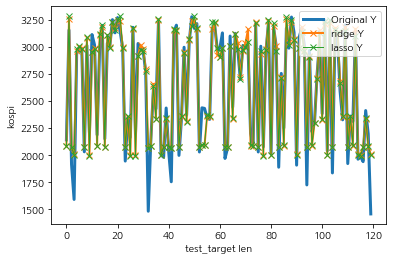

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(test_target)), test_target, '-', linewidth = 3, label="Original Y")
# ax.plot(range(len(test_target)), test_prediction, '-x', label="linear Y")
ax.plot(range(len(test_target)), test_ridge_pre, '-x', linewidth = 2, label="ridge Y")
ax.plot(range(len(test_target)), test_lasso_pre, '-x', linewidth = 1, label="lasso Y")
plt.legend(loc='upper right')
plt.xlabel('test_target len')
plt.ylabel('kospi')
plt.show()

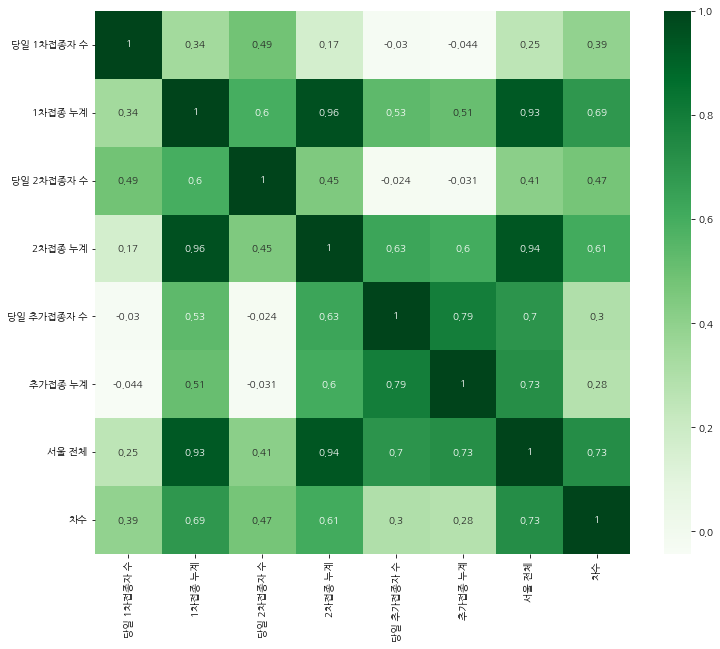

In [150]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_input.corr(), annot=True,cmap ='Greens')  # seaborn has very simple solution for heatmap

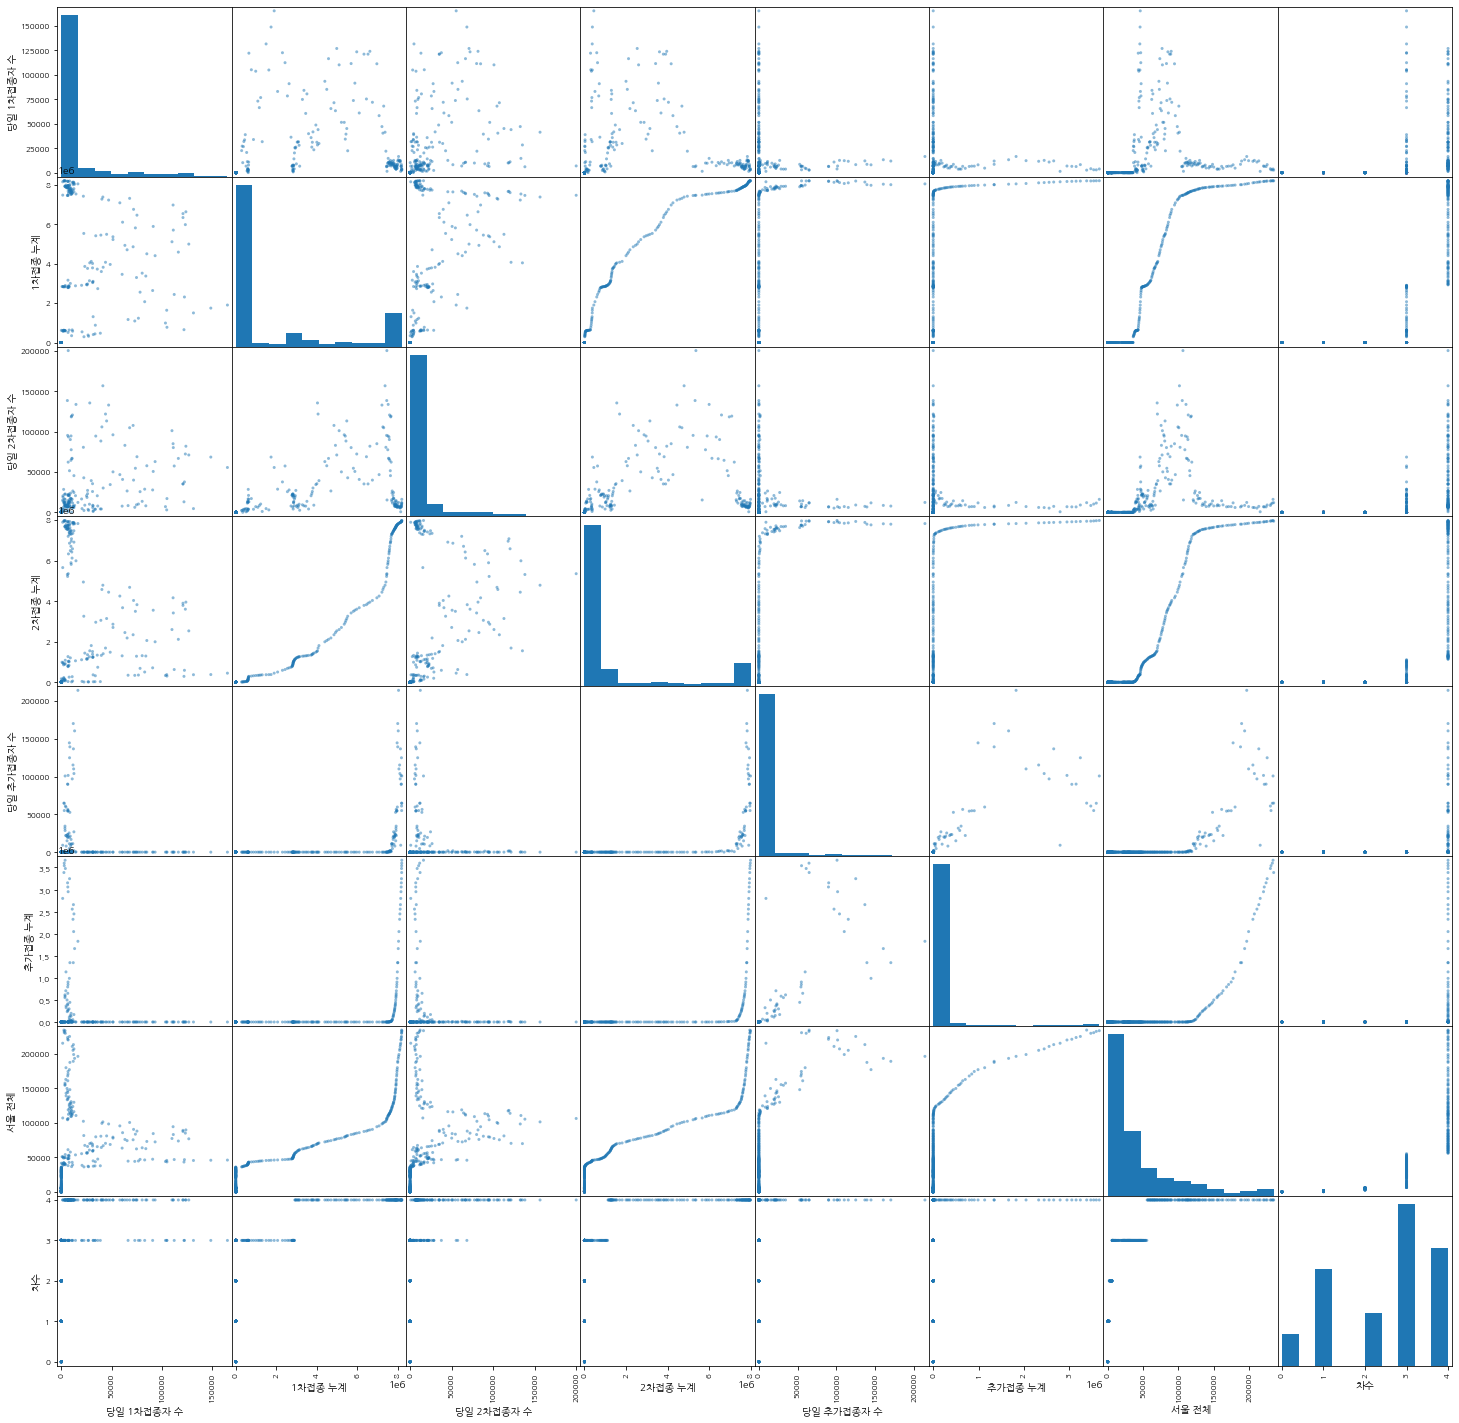

In [151]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df_input,figsize=(25, 25))